# Analysis of the Sinking of The Titanic

## What factors made people more likely to survive?  

Passenger Raw Data From Kaggle.com:   https://www.kaggle.com/c/titanic/download/train.csv

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sp
import csv
%matplotlib inline

In [35]:
import seaborn as sns

I started using Seaborn after seeing it come up in my stackoverflow search.  I then noticed that a lot of the seaborn examples are specifically taylored for this titanic dataset.  (no pun intended)

http://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical.html?highlight=bar%20plot

### Data Cleaning

In [2]:
titanic = pd.DataFrame.from_csv('/Users/ryanlambert/Downloads/titanic_data.csv')

#### Check that some of the data aren't missing

In [3]:
no_class_count = 0
for i in titanic['Pclass']:
    if i not in (1,2,3):
        no_class_count += 1
    
if no_class_count == 0:
    print "Not missing any classes"

Not missing any classes


Cabin location known or not.

In [4]:
# titanic[titanic['Cabin'].fillna('NaN') != 'NaN']
cabin_known = titanic['Cabin'].fillna('NaN') != 'NaN'

#### Is Cabin Location a useable feature?

Only 204 passengers have a known cabin.  

How did survival correlate with knowing a cabin or not?  (it shouldn't).

In [5]:
sp.stats.pearsonr(cabin_known, titanic['Survived'])

(0.31691152311229603, 3.0908910396536999e-22)

##### Cabin Location is not a useable feature from this data.

Cabin location would be useful.  Being in the front of the ship, one would have much more of their survivability depend on the chance of where the iceburg hit.  Whereas passengers in the rear of the ship would be affected by other variables: rate of spread of information, velocity to the top deck, etc.

Just having a recorded cabin location correlated, r .3169, p < .001 with survival.  (as can be seen above)

This suggests that cabin location wasn't independently recorded for passengers(i.e. before the accident).  

For this reason I will **exclude** cabin location from my analysis.

In [6]:
CHILD_AGE = 14

In [19]:
def wch_or_man(row):
    if row['Sex'] == 'female' or row['Age'] <= CHILD_AGE: 
        return 'WCh'
    else:
        return 'Man'
    
titanic['Woman Child or Man'] = titanic.apply(wch_or_man, axis=1)

In [21]:
titanic.groupby(['Woman Child or Man'])\
.corr(method='spearman')\
['Survived']

Woman Child or Man          
Man                 Age         0.061160
                    Fare        0.215034
                    Parch      -0.004673
                    Pclass     -0.201038
                    SibSp       0.029814
                    Survived    1.000000
WCh                 Age         0.155810
                    Fare        0.162069
                    Parch      -0.197901
                    Pclass     -0.508579
                    SibSp      -0.262220
                    Survived    1.000000
Name: Survived, dtype: float64

## What correlated most with survival?

#### Pearson's R for Survival: all passengers

In [20]:
titanic.corr(method='pearson')\
.sort_values('Survived')['Survived']\
.apply(lambda x: round(x, 2))

Pclass     -0.34
Age        -0.08
SibSp      -0.04
Parch       0.08
Fare        0.26
Survived    1.00
Name: Survived, dtype: float64

#### Pearson's R for Survival: Woman or Child


In [10]:
titanic_woman_or_child = titanic[titanic['Woman Child or Man'] == 'WCh']
titanic_woman_or_child.corr(method='pearson')\
.sort_values('Survived')['Survived']\
.round(2)

Pclass     -0.49
SibSp      -0.38
Parch      -0.23
Age         0.16
Fare        0.21
Survived    1.00
Name: Survived, dtype: float64

#### Pearson's R for Survival: Adult Male

In [11]:
titanic_adult_male = titanic[titanic['Woman Child or Man'] == 'Man']
titanic_adult_male.corr(method='pearson')\
.sort_values('Survived')['Survived']\
.round(2)

Pclass     -0.23
Parch      -0.02
SibSp      -0.02
Age         0.03
Fare        0.17
Survived    1.00
Name: Survived, dtype: float64

##### Pclass and Man/Woman seems to have the largest effect. 

In [81]:
titanic.groupby(['Woman Child or Man', 'Pclass'])\
.mean().round(2)['Survived']

Woman Child or Man  Pclass
Man                 1         0.35
                    2         0.08
                    3         0.12
WCh                 1         0.97
                    2         0.93
                    3         0.47
Name: Survived, dtype: float64

In [80]:
titanic.groupby(['Woman Child or Man', 'Pclass']).std().round(2)['Survived']

Woman Child or Man  Pclass
Man                 1         0.48
                    2         0.27
                    3         0.32
WCh                 1         0.17
                    2         0.26
                    3         0.50
Name: Survived, dtype: float64

In [72]:
survival_rates_means

Woman Child or Man  Pclass
Man                 1         0.35
                    2         0.08
                    3         0.12
WCh                 1         0.97
                    2         0.93
                    3         0.47
Name: Survived, dtype: float64

In [ ]:
df = titanic.loc[:,['Pclass', 'Woman Child or Man', 'Survived']].sort_values(['Pclass'])

g = sns.FacetGrid(df, 
                  row='Pclass', 
                  col='Woman Child or Man',)
g.map(plt.hist, 'Survived')

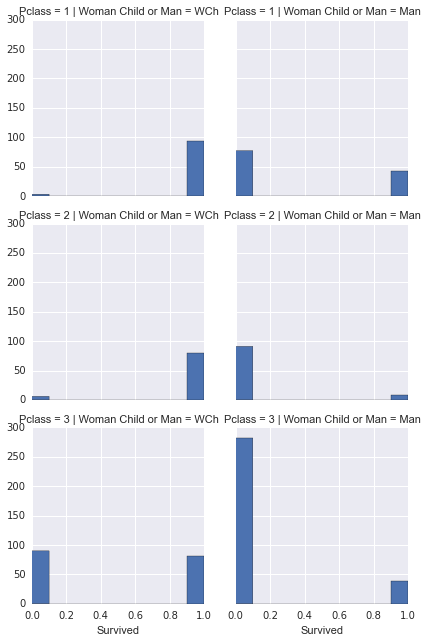

In [85]:
df = titanic.loc[:,['Pclass', 'Woman Child or Man', 'Survived']].sort_values(['Pclass'])

g = sns.FacetGrid(df, 
                  row='Pclass', 
                  col='Woman Child or Man',)
g.map(plt.hist, 'Survived')

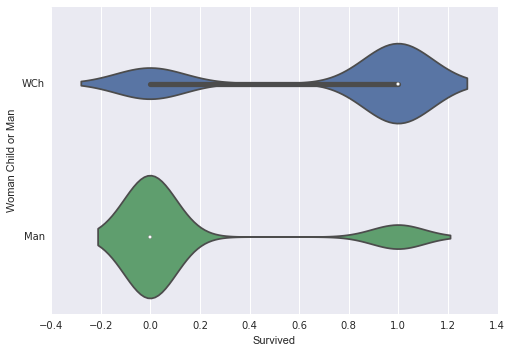

In [83]:
sns.violinplot(x='Survived', y='Woman Child or Man', data=df)

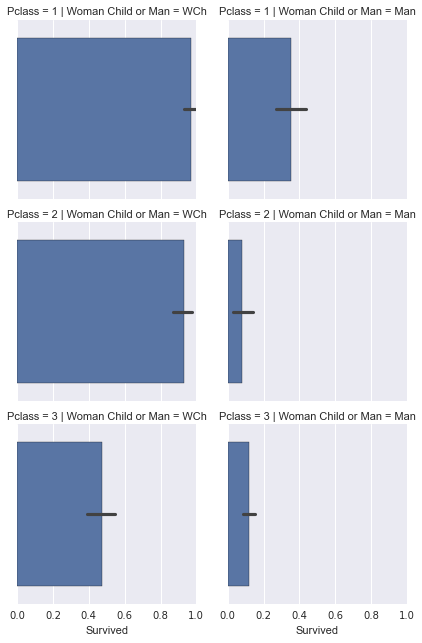

In [87]:
df = titanic.loc[:,['Pclass', 'Woman Child or Man', 'Survived']].sort_values(['Pclass'])

g = sns.FacetGrid(df, 
                  row='Pclass', 
                  col='Woman Child or Man',)
g.map(sns.barplot, 'Survived')

Feel like I should do something like below? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ff74690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111087c10>]], dtype=object)

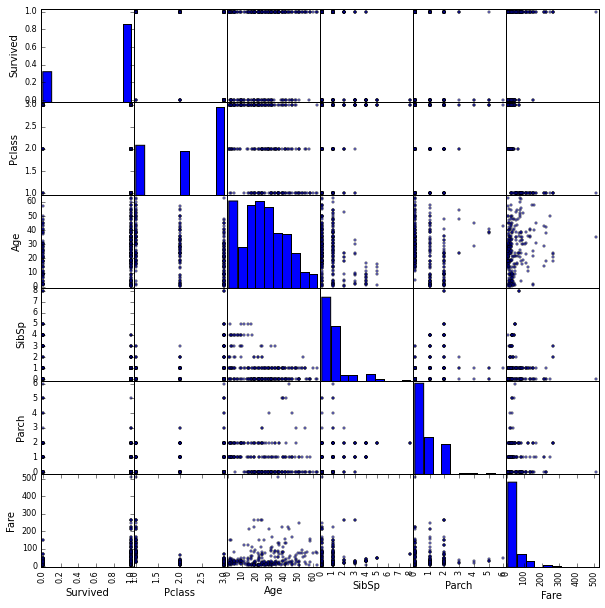

In [23]:
pd.tools.plotting\
.scatter_matrix(titanic_woman_or_child, 
                figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11117ded0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11076c410>]], dtype=object)

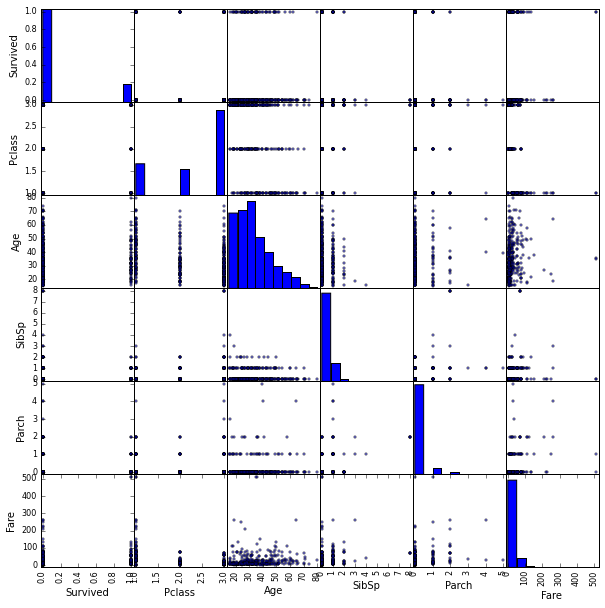

In [24]:
pd.tools.plotting\
.scatter_matrix(titanic_adult_male, 
                figsize=(10,10))